In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
df = pd.read_csv('ex2data1.txt', sep=',', header=None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [4]:
df.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


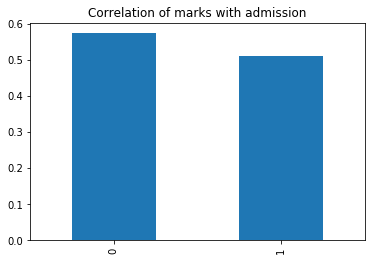

In [5]:
df.corr()[2][:-1].plot.bar(title='Correlation of marks with admission')

# Creating the Algorithm

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [7]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [8]:
def cost_function(theta, x,y):
     z = np.dot(x,theta)
     h = sigmoid(z)
     return (-1/m) * (np.dot(y.T,np.log(h)) + np.dot((1-y).T, np.log(1-h)))

In [9]:
def gradient(theta,x,y):
    z = np.dot(x,theta)
    h = sigmoid(z)
    diff = h-y
    return (1/m) * np.dot(X.T, diff)

In [11]:
m = len(X)
n = X.shape[1]

In [12]:
X = np.append(np.ones((m,1)), X,axis=1)

In [21]:
theta = np.zeros((n+1,1))

In [16]:
y = y.values.reshape(-1,1)

In [22]:
X.shape, theta.shape, y.shape

((100, 3), (3, 1), (100, 1))

In [ ]:
# cost_function(theta, X,y)

In [ ]:
# for loop for logistic regression' parameter
# a = 0.001
# iters_ = 10000
# for i in range(iters_):
#      z = np.dot(X,theta)
#      h = sigmoid(z)
#      J =  (-1/m) * (np.dot(y.T,np.log(h)) + np.dot((1-y).T, np.log(1-h)))
#      diff = h-y
#      grad = (1/m) * np.dot(X.T, diff)
#      theta = theta - (a * grad)

In [23]:
# no need for a forloop and learning rate to find the paramters, this func can be used directly
temp = opt.fmin_tnc(func = cost_function, 
                    x0 = theta.flatten(),fprime = gradient, 
                    args = (X, y.flatten()))
theta_opt = temp[0]

In [24]:
cost_function(theta_opt,X,y)

array([0.2034977])

In [ ]:
# Accuracy of the model

In [25]:
def accuracy(X, y, theta, cutoff):
    pred = [sigmoid(np.dot(X, theta)) >= cutoff]
    acc = np.mean(pred == y)
    print(acc * 100)
accuracy(X, y.flatten(), theta_opt, 0.5)

89.0


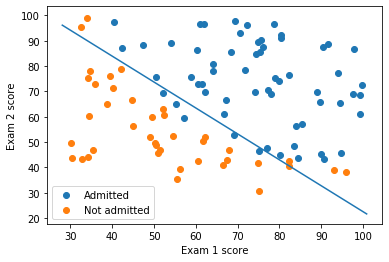

In [26]:
plot_x = [np.min(X[:,1]-2), np.max(X[:,2]+2)]
plot_y = -1/theta_opt[2]*(theta_opt[0] 
          + np.dot(theta_opt[1],plot_x))  
mask = y.flatten() == 1
adm = plt.scatter(X[mask][:,1], X[mask][:,2])
not_adm = plt.scatter(X[~mask][:,1], X[~mask][:,2])
decision_boun = plt.plot(plot_x, plot_y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()